# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [14]:
df = pd.read_excel("financial_loan_data_excel.xlsx")
df.head()


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


# Inspect Data

In [17]:
# Shape
print("Shape:", df.shape)

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Quick stats
df.describe(include="all").T.head(15)


Shape: (38576, 24)

Data Types:
id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: o

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,38576.0,NaN,NaN,NaN,681037.061385,54734.0,513517.0,662728.0,836506.0,1077501.0,211324.578218
address_state,38576,50,CA,6894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
application_type,38576,1,INDIVIDUAL,38576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,38576,11,10+ years,8870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,37138,28525,US Army,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,38576,7,B,11674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,38576,5,RENT,18439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_date,38576,NaN,NaN,NaN,2021-07-16 02:31:35.562007040,2021-01-01 00:00:00,2021-04-11 00:00:00,2021-07-11 00:00:00,2021-10-11 00:00:00,2021-12-12 00:00:00,NaN
last_credit_pull_date,38576,NaN,NaN,NaN,2021-06-08 13:36:34.193280512,2021-01-08 00:00:00,2021-04-15 00:00:00,2021-05-16 00:00:00,2021-08-13 00:00:00,2022-01-20 00:00:00,NaN
last_payment_date,38576,NaN,NaN,NaN,2021-06-26 09:52:08.909166080,2021-01-08 00:00:00,2021-03-16 00:00:00,2021-06-14 00:00:00,2021-09-15 00:00:00,2021-12-15 00:00:00,NaN


# Data Cleaning

In [20]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date column
df['issue_date'] = pd.to_datetime(df['issue_date'], errors="coerce")

# Handle categorical missing values
for col in ['emp_length','purpose','home_ownership','grade','address_state']:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Convert percentage columns
df['int_rate'] = df['int_rate'].astype(str).str.replace("%","").astype(float)
df['dti'] = df['dti'].astype(float)

# Employment length clean-up
def emp_length_to_years(x):
    if pd.isna(x): return np.nan
    x = str(x).lower()
    if "< 1" in x: return 0.5
    if "10+" in x: return 10
    digits = ''.join([c for c in x if c.isdigit()])
    return float(digits) if digits else np.nan

df['emp_length_years'] = df['emp_length'].apply(emp_length_to_years)

# Term conversion
df['term_months'] = df['term'].astype(str).str.replace("months","").str.strip().astype(float)


# Feature Engineering

In [23]:
# Extract year & month
df['issue_year'] = df['issue_date'].dt.year
df['issue_month'] = df['issue_date'].dt.month
df['issue_ym'] = df['issue_date'].dt.to_period("M")

# Good vs Bad loans
df['is_good_loan'] = df['loan_status'].isin(['Fully Paid','Current'])
df['is_bad_loan'] = df['loan_status'].isin(['Charged Off'])

# Recovery percentage
df['recovery_percent'] = (df['total_payment'] / df['loan_amount']) * 100


# KPI Calculations

In [28]:
# Overall KPIs
print("Total Applications:", df['id'].nunique())
print("Total Funded Amount:", df['loan_amount'].sum())
print("Total Amount Received:", df['total_payment'].sum())
print("Average Interest Rate:", df['int_rate'].mean())
print("Average DTI:", df['dti'].mean())

# Good vs Bad
good_pct = df['is_good_loan'].mean() * 100
bad_pct = df['is_bad_loan'].mean() * 100
print(f"Good Loan %: {good_pct:.2f} | Bad Loan %: {bad_pct:.2f}")


Total Applications: 38576
Total Funded Amount: 435757075
Total Amount Received: 473070933
Average Interest Rate: 0.12048831397760265
Average DTI: 0.13327433119037743
Good Loan %: 86.18 | Bad Loan %: 13.82


# Loan Status Distribution

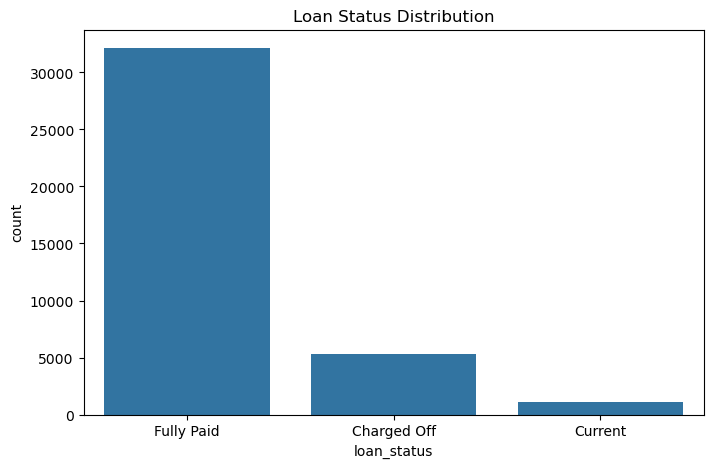

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="loan_status", order=df['loan_status'].value_counts().index)
plt.title("Loan Status Distribution")
plt.show()


# Monthly Loan Trends

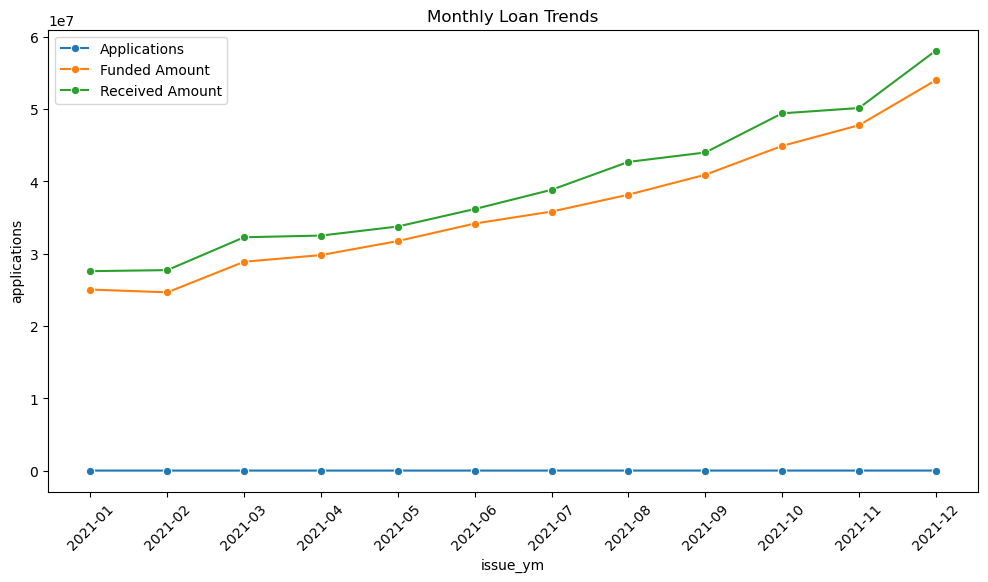

In [56]:
# ---- Cell 8 (Fixed) ----

# Group by Year-Month
monthly = df.groupby("issue_ym").agg(
    applications=("id","count"),
    funded_amount=("loan_amount","sum"),
    received_amount=("total_payment","sum")
).reset_index()

# Ensure issue_ym is string for plotting (not period/object mix)
monthly['issue_ym'] = monthly['issue_ym'].astype(str)

# Convert y-axis values to numeric (in case of object type)
monthly['applications'] = pd.to_numeric(monthly['applications'], errors='coerce')
monthly['funded_amount'] = pd.to_numeric(monthly['funded_amount'], errors='coerce')
monthly['received_amount'] = pd.to_numeric(monthly['received_amount'], errors='coerce')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x="issue_ym", y="applications", data=monthly, marker="o", label="Applications")
sns.lineplot(x="issue_ym", y="funded_amount", data=monthly, marker="o", label="Funded Amount")
sns.lineplot(x="issue_ym", y="received_amount", data=monthly, marker="o", label="Received Amount")
plt.xticks(rotation=45)
plt.title("Monthly Loan Trends")
plt.legend()
plt.show()



# Loan Purpose Analysis

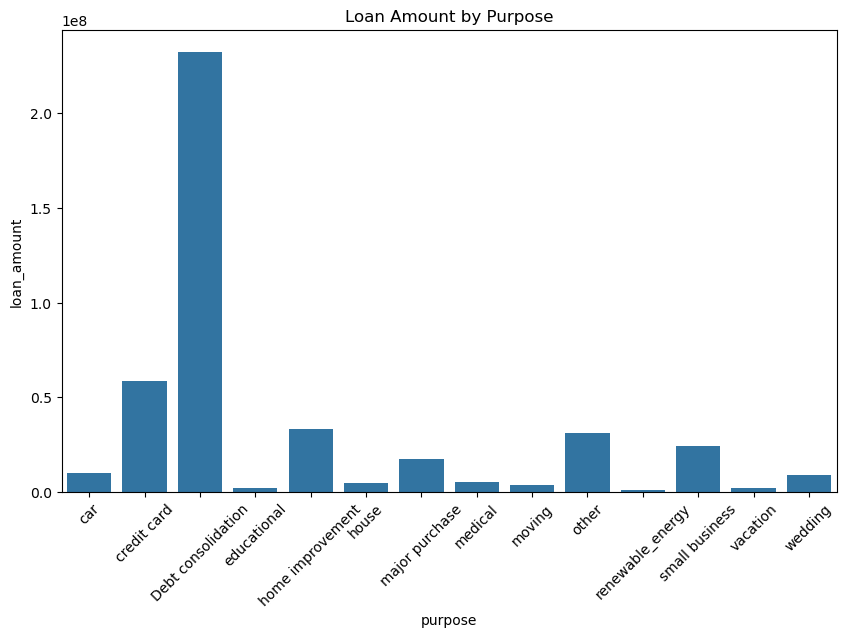

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="purpose", y="loan_amount", estimator=sum, errorbar=None)
plt.xticks(rotation=45)
plt.title("Loan Amount by Purpose")
plt.show()


# Employment Length Analysis

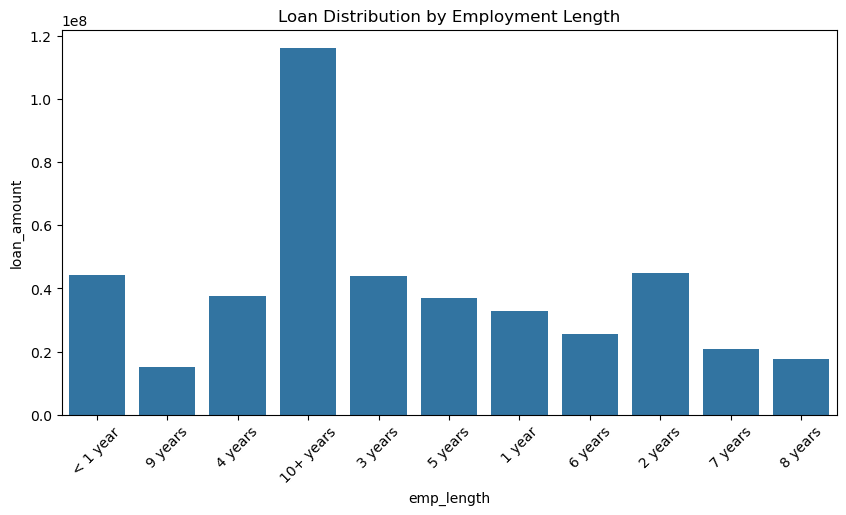

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="emp_length", y="loan_amount", estimator=sum, errorbar=None)
plt.xticks(rotation=45)
plt.title("Loan Distribution by Employment Length")
plt.show()



# Home Ownership Treemap

In [66]:
!pip install squarify


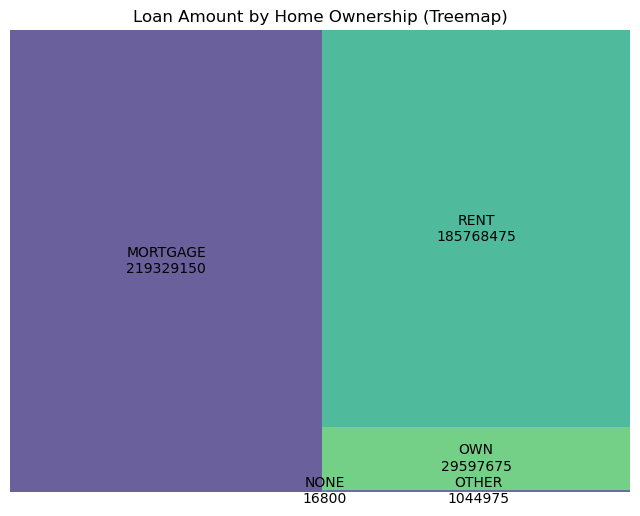

In [68]:
import squarify

home = df.groupby("home_ownership").loan_amount.sum().reset_index()

plt.figure(figsize=(8,6))
squarify.plot(
    sizes=home['loan_amount'],
    label=home['home_ownership'] + "\n" + home['loan_amount'].round(0).astype(str),
    alpha=0.8
)
plt.title("Loan Amount by Home Ownership (Treemap)")
plt.axis("off")
plt.show()


# Correlation Heatmap

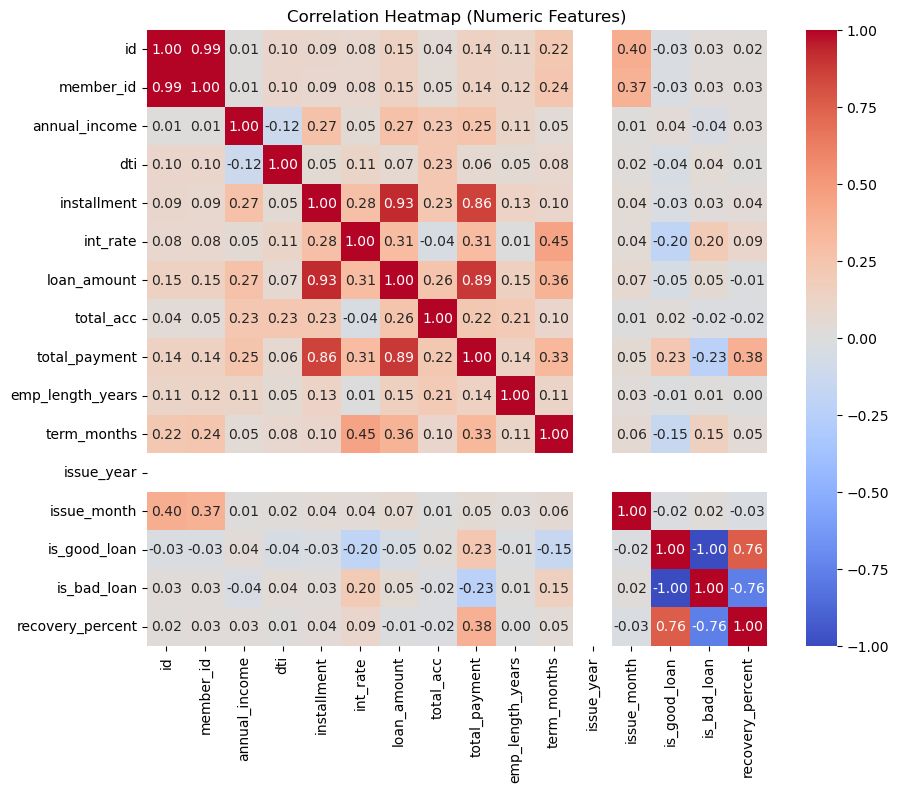

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
